In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'dC/dt vs Time')

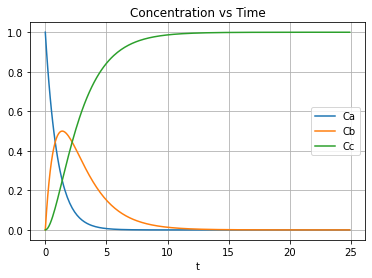

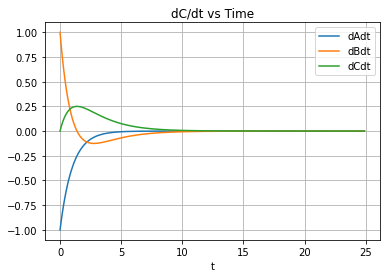

In [2]:
k1 = 1
k2 = 0.5

def rate(C,t):
    Ca = C[0]
    Cb = C[1]
    Cc = C[2]

    dAdt = -k1 * Ca
    dBdt = k1*Ca - k2*Cb
    dCdt = k2*Cb

    return [dAdt,dBdt,dCdt]

C0 = [1,0,0]
t = np.arange(0, 25, 0.1)
sol = odeint(rate, C0, t)
data = pd.DataFrame(sol)
data["t"] = t
data = data.rename(columns={0:"Ca", 1:"Cb",2:"Cc"})

dydt = pd.DataFrame()
dydt["t"] = t
dydt["dAdt"] = -k1 * data.Ca
dydt["dBdt"] = k1*data.Ca - k2*data.Cb
dydt["dCdt"] = k2*data.Cb

# fig, ax = plt.subplot(121)
data.set_index('t').plot()
plt.title("Concentration vs Time")
plt.grid()
dydt.set_index('t').plot()
plt.grid()
plt.title("dC/dt vs Time")

# Version 2 of Problem (Temperature Dependence)

Text(0, 0.5, 'Converstion of A (X)')

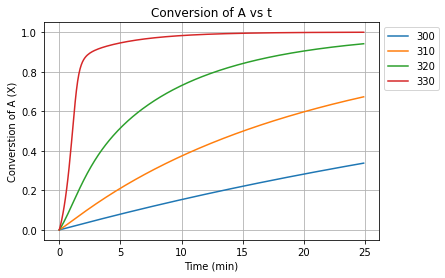

In [11]:
k1 = 1
k2 = 0.5

def rate(CT,t,Tc):
    UA = 50000
    deltaH = -50000
    V = 100
    rho = 1000
    Cp = 0.239

    A = 7.2*10**10
    E_R = 8750

    Ca = CT[0]
    T = CT[1]

    k = A*np.exp(-E_R/T)

    dCadt = -k*Ca
    dTdt = (-deltaH)*k*Ca/(rho*Cp) - UA*(T-Tc)/(rho*Cp*V)

    return [dCadt,dTdt]

Ca0 = 0.5
time1 = np.arange(0, 120, 0.5)
temps = [300,310,320,330]

all_data = pd.DataFrame()

for i in range(0,len(temps)):
    Tc = temps[i] 
    C0 = [Ca0 , temps[i]]
    sol = odeint(rate, C0, t , args=(temps[i],))
    data = pd.DataFrame(sol)
    data["t"] = t
    data = data.rename(columns={0:"Ca", 1:"T"})
    data["Conversion"] = (Ca0 - data.Ca) / Ca0 
    data["T0"] = temps[i]

    all_data = pd.concat([all_data,data])

sns.lineplot(data=all_data, x="t", y="Conversion", hue="T0", palette='tab10')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid()
plt.title("Conversion of A vs t")
plt.xlabel("Time (min)")
plt.ylabel("Converstion of A (X)")

Text(0, 0.5, 'Temperature (C)')

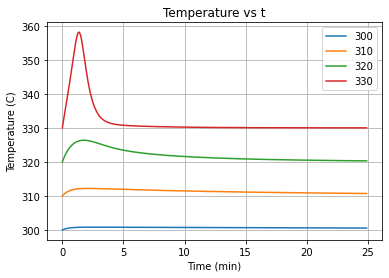

In [12]:
sns.lineplot(data=all_data, x="t", y="T", hue="T0", palette='tab10')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid()
plt.title("Temperature vs t")
plt.xlabel("Time (min)")
plt.ylabel("Temperature (C)")

In [ ]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(5,5)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

def animate(i):
    ax.clear()
    # Get the point from the points list at index i
    points = all_data[

    # Plot that point using the x and y coordinates
    ax.plot(point[0], point[1], color='green', 
            label='original', marker='o')
    # Set the x and y axis to display a fixed range
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    
ani = FuncAnimation(fig, animate, frames=len(temps),
                    interval=500, repeat=False)
plt.close()

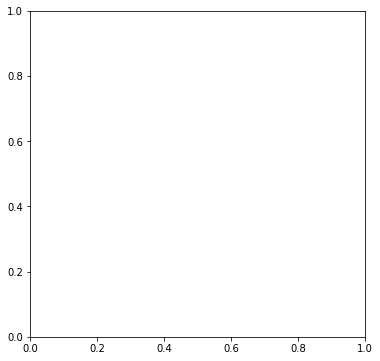

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

dt = 0.01
tfinal = 1
x0 = 0

sqrtdt = np.sqrt(dt)
n = int(tfinal/dt)
xtraj = np.zeros(n+1, float)
trange = np.linspace(start=0,stop=tfinal ,num=n+1)
xtraj[0] = x0

for i in range(n):
    xtraj[i+1] = xtraj[i] + np.random.normal()

x = trange
y = xtraj

# animation line plot example

fig, ax = plt.subplots(1, 1, figsize = (6, 6))

def animate(i):
    ax.cla() # clear the previous image
    ax.plot(x[:i], y[:i]) # plot the line
    ax.set_xlim([x0, tfinal]) # fix the x axis
    ax.set_ylim([1.1*np.min(y), 1.1*np.max(y)]) # fix the y axis

anim = animation.FuncAnimation(fig, animate, frames = len(x) + 1, interval = 1, blit = False)\

    
plt.show()